# Task 1) Summary Statistics of the training period and plot the kernel density of competitor stocks:

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock symbols
stocks = ['NFLX', 'DIS', 'AMZN', 'AAPL', 'T', 'CMCSA', 'GOOGL']

# Define the time period
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download the stock data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

data.head()

[*********************100%%**********************]  7 of 7 completed


Ticker,AAPL,AMZN,CMCSA,DIS,GOOGL,NFLX,T
Date,,,,,,,
2021-01-04,127.002113,159.331497,46.304565,177.102798,86.306503,522.859985,17.063850
2021-01-05,128.572327,160.925507,46.028294,177.860336,87.002502,520.799988,16.959520
2021-01-06,124.244377,156.919006,46.562439,178.538116,86.143997,500.489990,17.289900
2021-01-07,128.484024,158.108002,46.654522,177.999878,88.717003,508.890015,17.336267
2021-01-08,129.592987,159.134995,47.464951,178.109528,89.891502,510.399994,17.216713


In [5]:
# Compute and display summary statistics
summary_stats = data.describe()
print(summary_stats)


Ticker        AAPL        AMZN       CMCSA         DIS       GOOGL  \
count   753.000000  753.000000  753.000000  753.000000  753.000000   
mean    154.648270  138.282507   43.103258  127.216538  119.267204   
std      20.253558   27.465044    6.920561   38.073208   17.323152   
min     114.365547   81.820000   27.474331   79.062325   83.430000   
25%     140.206406  115.010002   37.819263   93.644798  104.440498   
50%     151.499557  140.389999   43.408253  108.964874  119.699997   
75%     171.393173  163.408005   48.733788  171.700409  135.116501   
max     197.857529  186.570496   57.373840  201.254089  149.838501   

Ticker        NFLX           T  
count   753.000000  753.000000  
mean    411.258008   16.428388  
std     133.230912    1.453314  
min     166.369995   12.776750  
25%     313.480011   15.386353  
50%     410.079987   16.736979  
75%     515.919983   17.512407  
max     691.690002   19.799135  


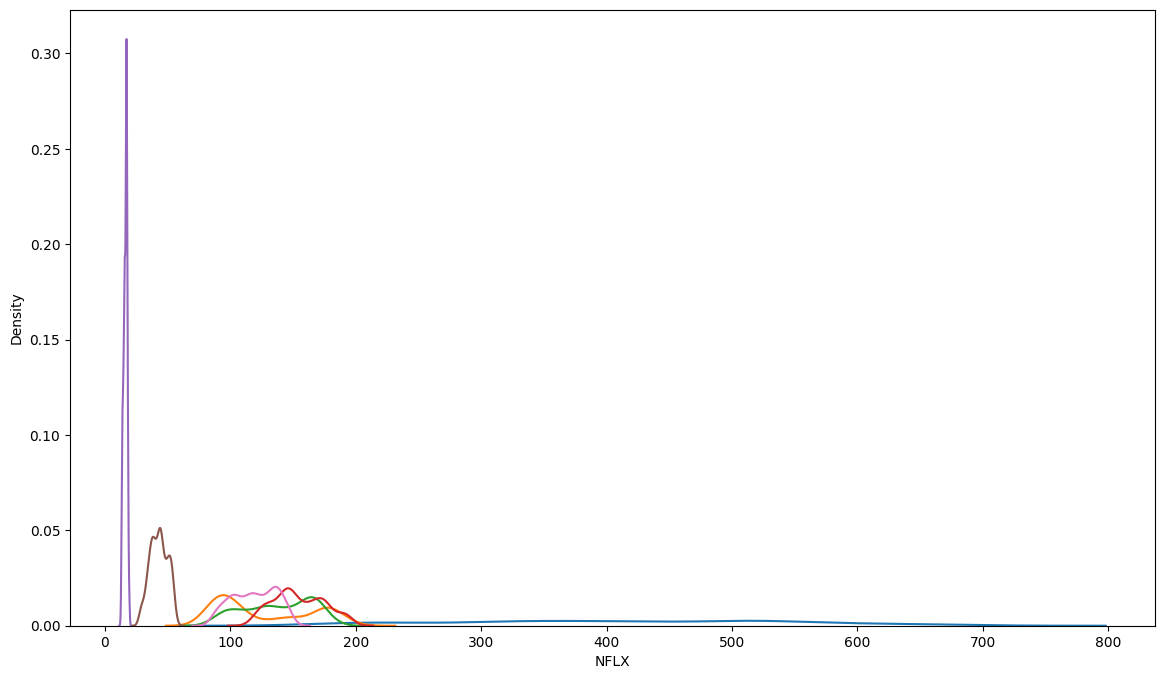

In [6]:
# Plotting the kernel density estimation (KDE) for each stock's closing prices
plt.figure(figsize=(14, 8))
for stock in stocks:
    sns.kdeplot(data[stock], label=stock)


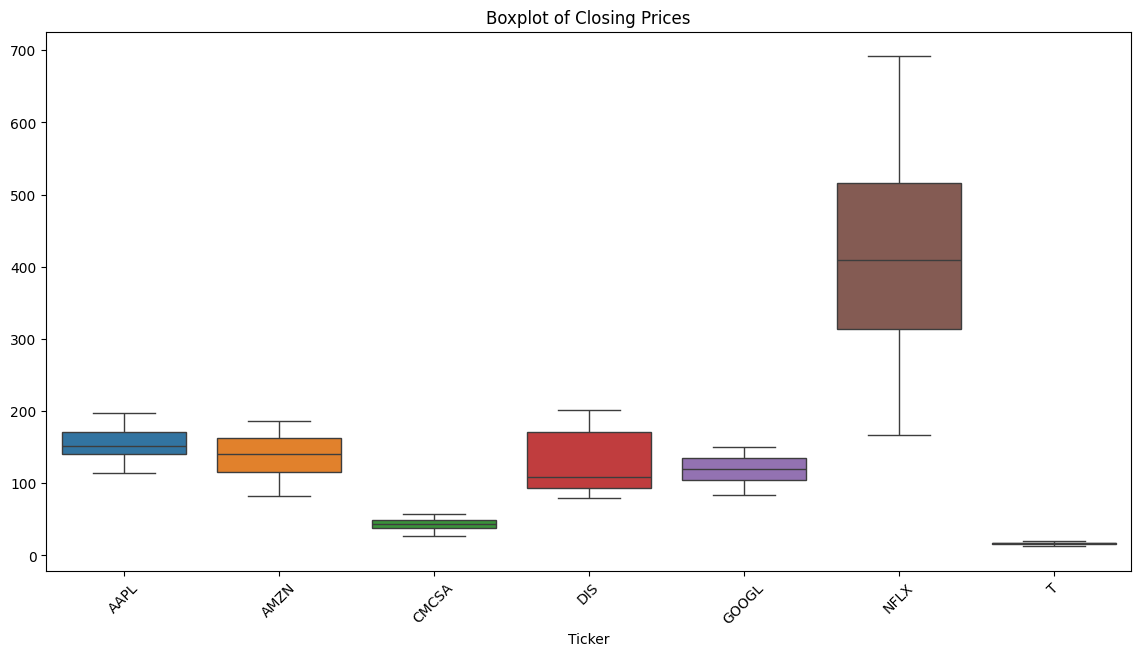

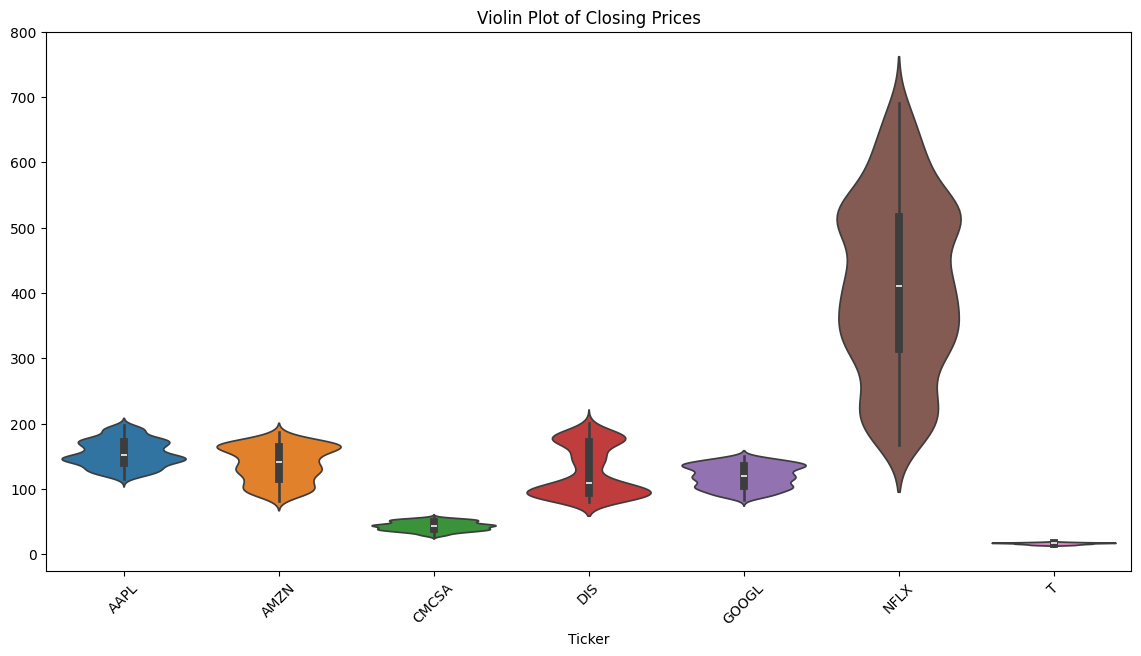

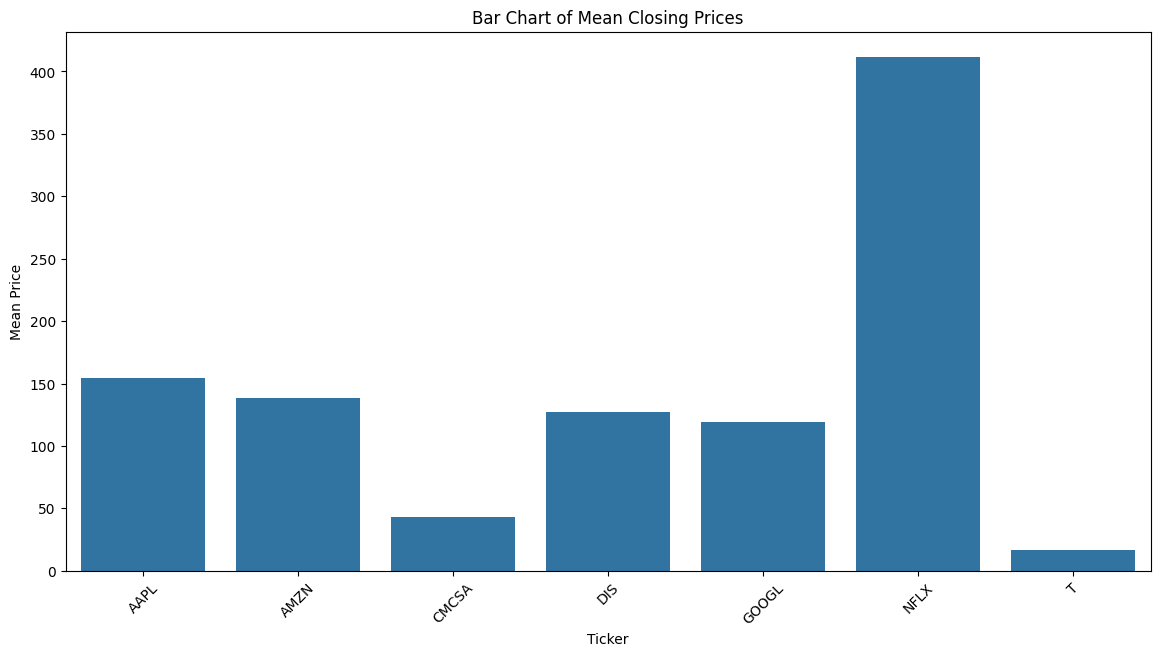

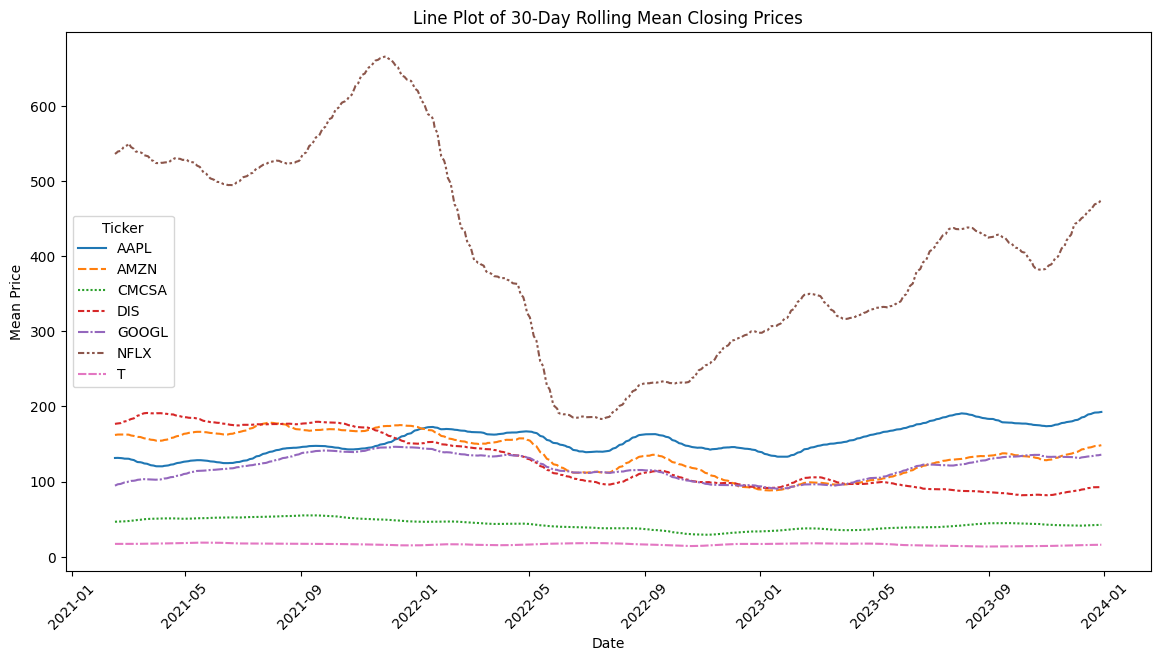

In [7]:
# Make sure to run this after you have the 'data' dataframe from the previous steps.

# Boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=data)
plt.title('Boxplot of Closing Prices')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

# Violin Plot
plt.figure(figsize=(14, 7))
sns.violinplot(data=data)
plt.title('Violin Plot of Closing Prices')
plt.xticks(rotation=45)
plt.show()

# Bar Chart of Mean Prices
plt.figure(figsize=(14, 7))
mean_prices = data.mean()
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Bar Chart of Mean Closing Prices')
plt.xticks(rotation=45)
plt.ylabel('Mean Price')
plt.show()

# Line Plot of Mean Prices over Time with Confidence Interval
plt.figure(figsize=(14, 7))
mean_prices_over_time = data.rolling(window=30).mean()  # 30-day rolling average
sns.lineplot(data=mean_prices_over_time)
plt.title('Line Plot of 30-Day Rolling Mean Closing Prices')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.show()


# Task 5 ) Garch Model:

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-82eaedb7e857>:45: OptimizeWarning: Unknown solver options: tol
  results = minimize(garch, param0, method='BFGS', options={'tol': 1e-8, 'disp': True})
<ipython-input-2-82eaedb7e857>:18: RuntimeWarning: invalid value encountered in sqrt
  F[t] = Y[t] - mu - np.sqrt(sigma2[t]) * np.random.standard_t(nv)
<ipython-input-2-82eaedb7e857>:18: RuntimeWarning: invalid value encountered in sqrt
  F[t] = Y[t] - mu - np.sqrt(sigma2[t]) * np.random.standard_t(nv)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 2491.305229
         Iterations: 0
         Function evaluations: 69
         Gradient evaluations: 10


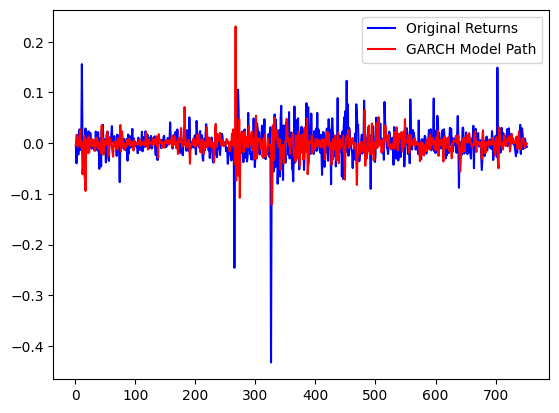

RMSE value is: 0.03839257212789609


In [2]:
import numpy as np
import pandas as pd
import scipy.special as ss
from scipy.optimize import minimize
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

np.random.seed(42)  # Set random seed for reproducibility

def garch(param, *args):
    mu, omega, alpha, beta, nv = param
    GARCH_Dens, sigma2, F, v = {}, {}, {}, {}
    sigma2[0] = np.var(Y)
    Likelihood = 0
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
        F[t] = Y[t] - mu - np.sqrt(sigma2[t]) * np.random.standard_t(nv)
        v[t] = sigma2[t]
        GARCH_Dens[t] = np.log(ss.gamma((nv+1)/2)) - np.log(np.sqrt(nv*np.pi)) - \
                        np.log(ss.gamma(nv/2)) - ((nv+1)/2) * np.log(1 + (F[t]**2 / v[t]) / nv)
        Likelihood += GARCH_Dens[t]
    return -Likelihood  # Minimizing negative likelihood

def garch_path(params, *args):
    mu, omega, alpha, beta, nv = params
    sigma2, path = {}, {}
    sigma2[0] = np.var(Y)
    path[0] = np.array([Y[0]])
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
        path[t] = mu + np.sqrt(sigma2[t]) * np.random.standard_t(nv)
    return path, sigma2

# Data retrieval and preparation
start_date = datetime(2021,1,1)
end_date = datetime(2023,12,31)
stock_symbol = 'NFLX'
stock = yf.download(stock_symbol, start_date, end_date)
Y = np.diff(np.log(stock['Adj Close'].values))
T = Y.shape[0]

# Parameter estimation
param0 = np.array([np.mean(Y), np.var(Y)/750, 0.30, 0.25, 10])
results = minimize(garch, param0, method='BFGS', options={'tol': 1e-8, 'disp': True})
param_star = results.x

# Path generation based on estimated parameters
path, vol = garch_path(param_star, Y, T)
Y_GARCH = np.hstack(list(path.values()))
timevec = np.linspace(1, T, T)
plt.plot(timevec, Y, 'b', label='Original Returns')
plt.plot(timevec, Y_GARCH, 'r', label='GARCH Model Path')
plt.legend()
plt.show()

# RMSE calculation
RMSE = np.sqrt(np.mean((Y_GARCH - Y) ** 2))
print('RMSE value is:', RMSE)


## Kalman Filtering:

[*********************100%%**********************]  1 of 1 completed
<ipython-input-3-20596867deea>:23: RuntimeWarning: overflow encountered in scalar power
  Likelihood += 0.5 * (np.log(2 * np.pi) + np.log(abs(F[s])) + (v[s]**2) / F[s])
<ipython-input-3-20596867deea>:17: RuntimeWarning: overflow encountered in scalar multiply
  v[s] = Y[s] - Z * u_predict[s-1]
<ipython-input-3-20596867deea>:19: RuntimeWarning: invalid value encountered in scalar add
  u_update[s] = u_predict[s-1] + K * v[s]
<ipython-input-3-20596867deea>:23: RuntimeWarning: overflow encountered in scalar power
  Likelihood += 0.5 * (np.log(2 * np.pi) + np.log(abs(F[s])) + (v[s]**2) / F[s])
<ipython-input-3-20596867deea>:17: RuntimeWarning: overflow encountered in scalar multiply
  v[s] = Y[s] - Z * u_predict[s-1]
<ipython-input-3-20596867deea>:19: RuntimeWarning: invalid value encountered in scalar add
  u_update[s] = u_predict[s-1] + K * v[s]
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: Op

         Current function value: 3433.988606
         Iterations: 1
         Function evaluations: 143
         Gradient evaluations: 27
RMSE values is: $ 1.7852522748659256


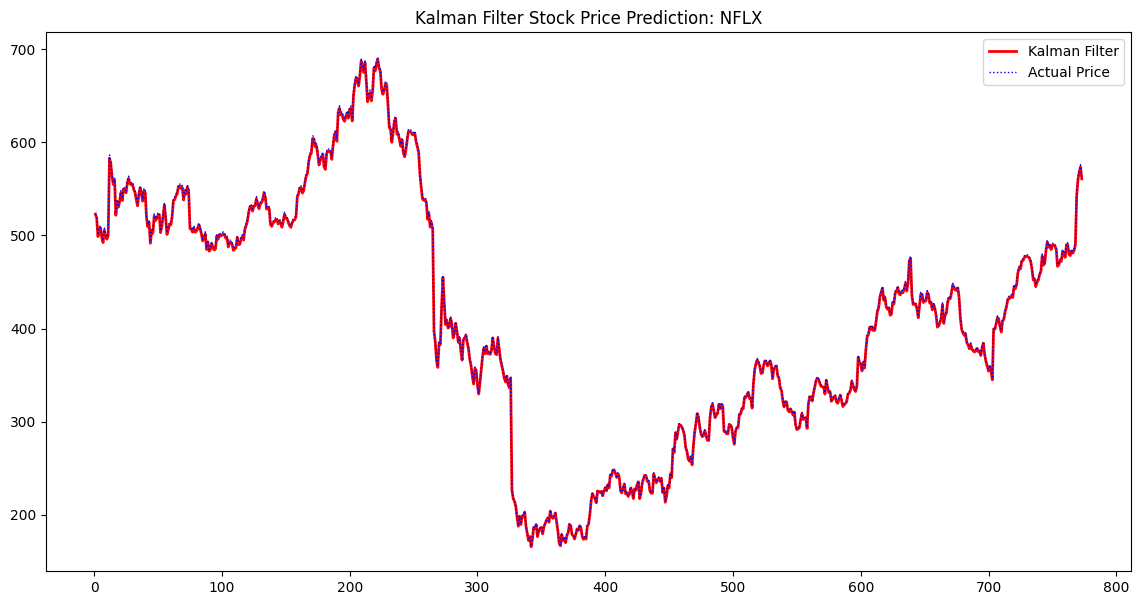

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from scipy.optimize import minimize

def kalman_filter(param, Y, S):
    Z, T, H, Q = param
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    u_update[0] = Y[0]  # initial state estimate
    u_predict[0] = u_update[0]  # first prediction
    P_update[0] = np.var(Y) / 4  # initial error covariance
    P_predict[0] = T * P_update[0] + Q  # initial prediction of error covariance
    Likelihood = 0
    for s in range(1, S):
        F[s] = Z * P_predict[s-1] + H
        v[s] = Y[s] - Z * u_predict[s-1]
        K = P_predict[s-1] / F[s]  # Kalman gain
        u_update[s] = u_predict[s-1] + K * v[s]
        P_update[s] = P_predict[s-1] - K * Z * P_predict[s-1]
        u_predict[s] = T * u_update[s]
        P_predict[s] = T * P_update[s] + Q
        Likelihood += 0.5 * (np.log(2 * np.pi) + np.log(abs(F[s])) + (v[s]**2) / F[s])
    return Likelihood


def kalman_smoother(params, Y, S):
    Z, T, H, Q = params
    u_update = {0: Y[0]}
    for s in range(1, S):
        F = Z * np.var(Y) / 4 + H
        v = Y[s] - Z * u_update[s-1]
        u_update[s] = u_update[s-1] + (np.var(Y) / 4 * v) / F
    return list(u_update.values())

# Retrieve and prepare data
start_date = datetime(2021,1,1)
end_date = datetime(2024,1,31)
stock_symbol = 'NFLX'
stock = yf.download(stock_symbol, start_date, end_date)
Y = stock['Adj Close'].values
S = len(Y)

# Optimize parameters
param0 = np.array([1, 0.9, np.var(Y) / 300, np.var(Y) / 300])  # Adjusted initial guesses
results = minimize(kalman_filter, param0, args=(Y, S), method='BFGS', options={'disp': True})

# Smooth and visualize the estimated path
param_star = results.x
smoothed_values = kalman_smoother(param_star, Y, S)
Y_kalmanFilter = np.hstack(smoothed_values)

#Plotting adjustments
timevec = np.linspace(1, S, S)
plt.figure(figsize=(14, 7))
plt.title('Kalman Filter Stock Price Prediction: ' + stock_symbol)
plt.plot(timevec, Y_kalmanFilter, 'r-', label='Kalman Filter', linewidth=2)
plt.plot(timevec, Y, 'b:', label='Actual Price', linewidth=1)

RMSE = np.sqrt(np.mean((Y_kalmanFilter - Y)**2))
print('RMSE values is: $', RMSE)
plt.legend()
plt.show()


#Task - 2) **FRED** , FAMA French , ADS , CAPM Momentum , VOLUME of Netflix. -> Target column Y is Netflix Return.

In [8]:
pip install fredapi

In [9]:
import pandas as pd
from functools import reduce
from fredapi import Fred

In [10]:
# FAMA 5 Factors Data:
path='/content/drive/MyDrive/ML Finance/F-F_Research_Data_5_Factors_daily.CSV'
data_ff5 = pd.read_csv(path)
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]

data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')
df_ffs.to_csv('fama.csv')

In [11]:
# ADS INDEX Data: (Aggregate Demand-Supply Index)
data_ads = pd.read_excel('/content/drive/MyDrive/ML Finance/ADS_Index_Most_Current_Vintage.xlsx')
# manually replace : into -
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')
df_ads

,ADS_Index
date,
1960-03-01,-0.569062
1960-03-02,-0.617724
1960-03-03,-0.663306
1960-03-04,-0.705824
1960-03-05,-0.745294
...,...
2024-03-12,-0.046230
2024-03-13,-0.044420
2024-03-14,-0.042867


In [12]:
# FRED DATA :
fred = Fred(api_key='a46a25130b2938042810ca32abb5039a')

varList = ['T10Y3M', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
               'NIKKEI225', 'AMERIBOR', 'T10YIE', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY',
                              'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M', 'DCOILWTICO',
                              'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP'] # JPN stock mkt index

df = pd.DataFrame()
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500

# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)


In [13]:
start_date = '2021-01-01'
end_date = '2023-12-31'
mask = (df_ffs.index >= start_date) & (df_ffs.index <= end_date)
df_ffs = df_ffs.loc[mask]

DATA_part1 = pd.merge(df_ffs, df_ads, left_index=True, right_index=True)
DATA = pd.merge(DATA_part1, df_fred, left_index=True, right_index=True)
DATA.reset_index(inplace=True)
DATA = DATA.rename(columns = {'index':'Date'})

DATA.to_csv('INFOP7374_FeatureMart.csv', index=True)

In [14]:
df = pd.read_csv('/content/drive/MyDrive/ML Finance/INFOP7374_FeatureMart.csv')

In [15]:
df.dropna(inplace = True)

In [16]:
df.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,...,DGS10,DGS1,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP
0,1/4/21,-1.41,0.16,0.58,-0.64,0.10,-0.030460,0.172399,0.679529,0.84,...,0.93,0.10,0.13,0.10,0.09,0.820504,2.60,0.0,0.0,0.0
1,1/5/21,0.86,1.32,0.49,0.36,0.55,-0.151746,0.708254,0.692205,0.87,...,0.96,0.10,0.15,0.11,0.10,4.866231,2.77,0.0,0.0,0.0
2,1/6/21,0.79,3.15,3.94,0.06,0.53,-0.219010,0.570990,0.703883,0.95,...,1.04,0.11,0.13,0.11,0.10,1.345922,2.76,0.0,0.0,0.0
3,1/7/21,1.76,0.02,-0.83,-1.50,-0.20,-0.275264,1.484736,0.714569,0.99,...,1.08,0.11,0.14,0.10,0.09,0.356789,2.81,0.0,0.0,0.0
4,1/8/21,0.51,-1.01,-1.37,-0.43,-0.37,0.039189,0.549189,0.724266,1.05,...,1.13,0.10,0.13,0.10,0.08,2.982421,2.77,0.0,0.0,0.0


In [28]:
# This is for Netflix Data :
import yfinance as yf

# Define the ticker symbol for Netflix
ticker_symbol = 'NFLX'

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the desired columns
netflix_data = data[['Adj Close', 'Volume']]

netflix_data['NFLX_RT'] = (netflix_data['Adj Close'].pct_change())*100
netflix_data.dropna(inplace = True)
netflix_data = netflix_data.iloc[:,1:]

netflix_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
<ipython-input-28-0b77fb5b9188>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data['NFLX_RT'] = (netflix_data['Adj Close'].pct_change())*100
<ipython-input-28-0b77fb5b9188>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data.dropna(inplace = True)


In [29]:
netflix_data.head()

,Date,Volume,NFLX_RT
0,2021-01-05,3133900,-0.393986
1,2021-01-06,5346200,-3.899769
2,2021-01-07,3686400,1.678360
3,2021-01-08,2973900,0.296720
4,2021-01-11,3806200,-2.213947


In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
netflix_data['Date'] = pd.to_datetime(netflix_data['Date'], format='%Y-%m-%d')
# Inner Join with Date:
df_c = pd.merge(df, netflix_data, on='Date', how='inner')

In [31]:
# Create CAPM column for Netflix stocks Expected return:
df_c['CAPM'] = (df_c['RF'] + 1.2*(df_c['SP500'] - df_c['RF']))

columns = df_c.columns.tolist()

# Swap the last two columns
columns[-1], columns[-2] = columns[-2], columns[-1]

df_c = df_c[columns]
# df_c=df_c.drop('CAPM',axis=1)
df_c.head()


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,...,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,Volume,CAPM,NFLX_RT
0,2021-01-05,0.86,1.32,0.49,0.36,0.55,-0.151746,0.708254,0.692205,0.87,...,0.11,0.10,4.866231,2.77,0.0,0.0,0.0,3133900,0.880254,-0.393986
1,2021-01-06,0.79,3.15,3.94,0.06,0.53,-0.219010,0.570990,0.703883,0.95,...,0.11,0.10,1.345922,2.76,0.0,0.0,0.0,5346200,0.728990,-3.899769
2,2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,-0.275264,1.484736,0.714569,0.99,...,0.10,0.09,0.356789,2.81,0.0,0.0,0.0,3686400,1.836736,1.678360
3,2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.039189,0.549189,0.724266,1.05,...,0.10,0.08,2.982421,2.77,0.0,0.0,0.0,2973900,0.651189,0.296720
4,2021-01-11,-0.51,0.54,1.26,-0.17,0.45,-0.145480,-0.655480,0.741620,1.07,...,0.11,0.10,0.019179,2.71,0.0,0.0,0.0,3806200,-0.757480,-2.213947


In [32]:
df_c.set_index('Date', inplace = True)

# **Task - 3) Feature selection Ridge,  Lasso,  Elastic Net and LAR VS Random Forest,  XGBoost.**

In [33]:
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy.stats as ss
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from regressors import stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
scaler = MinMaxScaler()

df_s = pd.DataFrame(scaler.fit_transform(df_c), columns=df_c.columns)

In [40]:
df_s.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,OBMMIJUMBO30YF,...,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,Volume,CAPM,NFLX_RT
0,0.516550,0.692058,0.557692,0.396226,0.631985,0.327608,0.509968,0.625900,0.663462,0.005011,...,0.020295,0.018382,0.852251,0.046564,0.0,0.0,0.0,0.013980,0.511075,0.668116
1,0.509529,0.988655,1.000000,0.349057,0.628131,0.254068,0.496057,0.629403,0.682692,0.011136,...,0.020295,0.018382,0.711473,0.046112,0.0,0.0,0.0,0.030727,0.498322,0.600659
2,0.606820,0.481361,0.388462,0.103774,0.487476,0.192567,0.588662,0.632608,0.692308,0.012249,...,0.018450,0.016544,0.671918,0.048373,0.0,0.0,0.0,0.018162,0.591715,0.707991
3,0.481444,0.314425,0.319231,0.272013,0.454721,0.536356,0.493848,0.635516,0.706731,0.007795,...,0.018450,0.014706,0.776917,0.046564,0.0,0.0,0.0,0.012768,0.491762,0.681406
4,0.379137,0.565640,0.656410,0.312893,0.612717,0.334459,0.371758,0.640721,0.711538,0.014662,...,0.020295,0.018382,0.658417,0.043852,0.0,0.0,0.0,0.019069,0.372999,0.633097


In [72]:
df_s.to_csv('Timestat.csv')

In [89]:
# Lasso Regression

X = df_c.drop('NFLX_RT',axis=1)
Y = df_c['NFLX_RT']

a = 0.5
model1_prep = linear_model.Lasso(alpha=a, fit_intercept=False).fit(X, Y)
model1_select = X.columns[np.abs(model1_prep.coef_)!=0.0]
x = X[model1_select]
model1 = sm.OLS(Y,x).fit()
print(model1.summary())
y_pred_model1 = model1.predict(x)
corr_model1 = ss.pearsonr(y_pred_model1, Y)[0]
print('model 1 LASSO: corr (Y, Y_pred) = '+str(corr_model1))
print('LASSO selected ' +str(len(model1_select)) +' features: ', model1_select.values)

                                 OLS Regression Results                                
Dep. Variable:                NFLX_RT   R-squared (uncentered):                   0.380
Model:                            OLS   Adj. R-squared (uncentered):              0.375
Method:                 Least Squares   F-statistic:                              76.30
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                    3.12e-74
Time:                        18:12:24   Log-Likelihood:                         -1741.4
No. Observations:                 752   AIC:                                      3495.
Df Residuals:                     746   BIC:                                      3523.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [63]:
# Ridge Regression:
a = 0.5
model2_prep = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X, Y)
model2_select = X.columns[np.abs(model2_prep.coef_)>=0.001]
x = X[model2_select]
model2 = sm.OLS(Y,x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, Y)[0]
print('model 2 Ridge Regression: corr (Y, Y_pred) = '+str(corr_model2))
print('Ridge Regression selected ' +str(len(model2_select)) +' features: ', model2_select.values)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.399
Model:                            OLS   Adj. R-squared (uncentered):              0.373
Method:                 Least Squares   F-statistic:                              14.97
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                    4.98e-60
Time:                        17:55:14   Log-Likelihood:                         -1729.6
No. Observations:                 752   AIC:                                      3523.
Df Residuals:                     720   BIC:                                      3671.
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.79971e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [64]:
# Elastic Net
a = 0.5
model3_prep = linear_model.ElasticNet(alpha=a, fit_intercept=False).fit(X, Y)
model3_select = X.columns[np.abs(model3_prep.coef_)!=0.0]
x = X[model3_select]
model3 = sm.OLS(Y,x).fit()
print(model3.summary())
y_pred_model3 = model3.predict(x)
corr_model3 = ss.pearsonr(y_pred_model3, Y)[0]
print('model 3 Elastic Net: corr (Y, Y_pred) = '+str(corr_model3))
print('ElasticNet selected ' +str(len(model3_select)) +' features: ', model3_select.values)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.398
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                              49.03
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                    3.76e-75
Time:                        17:55:26   Log-Likelihood:                         -1730.6
No. Observations:                 752   AIC:                                      3481.
Df Residuals:                     742   BIC:                                      3527.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [65]:
# Least Angle Regression:

model4_prep = linear_model.Lars().fit(X, Y)
model4_select = X.columns[model4_prep.coef_>=0.001]
x = X[model4_select]
model4 = sm.OLS(Y,x).fit()
print(model4.summary())
y_pred_model4 = model4.predict(x)
corr_model4 = ss.pearsonr(y_pred_model1, Y)[0]
print('model 4 LARS: corr (Y, Y_pred) = '+str(corr_model4))
print('LARS selected ' +str(len(model4_select)) +' features: ', model4_select.values + '\n')


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              30.14
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                    6.63e-73
Time:                        17:55:29   Log-Likelihood:                         -1722.4
No. Observations:                 752   AIC:                                      3479.
Df Residuals:                     735   BIC:                                      3557.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 46 iterations, i.e. alpha=1.027e+03, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


In [57]:
# Random Forest:

from sklearn.ensemble import RandomForestRegressor


# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, Y)

# Feature importances
feature_importances = rf.feature_importances_

# Get the indices of the features sorted by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature Importance Scores:")
F_df = pd.DataFrame({ 'Col_Name': X.columns,
                      'Score':feature_importances })
F_df = F_df.sort_values(by='Score', ascending=False)
print(F_df)





Feature Importance Scores:
          Col_Name     Score
36          Volume  0.336854
0           Mkt-RF  0.225690
4              CMA  0.069156
2              HML  0.044096
37            CAPM  0.035674
6            SP500  0.034441
32         DHHNGSP  0.014776
11         DEXJPUS  0.013877
31      DCOILWTICO  0.013823
5               RF  0.013275
17          VIXCLS  0.012462
3              RMW  0.012086
7        ADS_Index  0.011604
1              SMB  0.010995
26           DGS10  0.010912
20       NIKKEI225  0.010854
16    DCOILBRENTEU  0.010436
18            DAAA  0.010110
19            DBAA  0.009904
24    BAMLH0A0HYM2  0.009534
14        CBETHUSD  0.009465
13        CBBTCUSD  0.009206
12         DEXUSUK  0.008052
10         DEXUSEU  0.007812
9   OBMMIJUMBO30YF  0.006748
23           T5YIE  0.006675
25  BAMLH0A0HYM2EY  0.006074
15        T10YIE_x  0.005458
27            DGS1  0.005393
30          DCPF1M  0.005253
8           T10Y3M  0.004948
22        T10YIE_y  0.004145
21        AMERIB

In [81]:
# Random Forest Tree:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# By Default it will take 39 Tree to build this model.

# Step 3: Fit the Random Forest model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances = model.feature_importances_

# Step 5: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 6: Calculate the RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE Score:", rmse)


RMSE Score: 2.9526245390107557


In [68]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(mean_squared_error(y_test, y_pred_100, squared=False )))

Model accuracy score with 100 decision-trees : 2.9279


In [69]:
top_features = X.columns[sorted_indices[:10]]

top_feature_importances = feature_importances[sorted_indices[:10]]

# Create a Plotly bar chart
fig = go.Figure(go.Bar(
    x=top_feature_importances,
    y=top_features,
    orientation='h'
))

fig.update_layout(
    title='Top 10 Features by Importance',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
    yaxis={'categoryorder':'total ascending'}
)

# Show plot
fig.show()

In [70]:
# XGBoost Model :

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize XGBoost model
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE Score:", rmse)


RMSE Score: 2.875766635808927


In [71]:
X_df = pd.DataFrame({ 'Col_Name': X.columns,
                      'Score':feature_importances })
X_df = X_df.sort_values(by='Score', ascending=False)
print(X_df)

          Col_Name     Score
36          Volume  0.125193
4              CMA  0.116039
17          VIXCLS  0.107454
30          DCPF1M  0.095695
15        T10YIE_x  0.071464
0           Mkt-RF  0.064256
2              HML  0.060328
37            CAPM  0.038326
24    BAMLH0A0HYM2  0.033326
6            SP500  0.028481
1              SMB  0.028392
18            DAAA  0.022802
8           T10Y3M  0.020751
16    DCOILBRENTEU  0.019392
5               RF  0.017839
29          DCPN3M  0.016549
32         DHHNGSP  0.013185
12         DEXUSUK  0.009886
20       NIKKEI225  0.009640
31      DCOILWTICO  0.009465
14        CBETHUSD  0.009401
3              RMW  0.008833
10         DEXUSEU  0.008396
7        ADS_Index  0.008196
9   OBMMIJUMBO30YF  0.008065
11         DEXJPUS  0.007828
13        CBBTCUSD  0.007058
25  BAMLH0A0HYM2EY  0.006321
23           T5YIE  0.005565
26           DGS10  0.005305
19            DBAA  0.005191
21        AMERIBOR  0.004065
28  RIFSPPFAAD90NB  0.003697
27            

# **Task 4) Models for Main Dataset:**

In [428]:
pip install catboost

In [429]:

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Name:

# Model with all features:

Models = [
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(n_estimators=100,random_state = 42)
]

results = []
# Iterating over algorithms and printing scores
for reg in Models:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    results.append({'Model': type(reg).__name__, 'RMSE': rmse, 'R2': r2})

# df_m = pd.DataFrame(results)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.25557e-17): result may not be accurate.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5841
[LightGBM] [Info] Number of data points in the train set: 601, number of used features: 35
[LightGBM] [Info] Start training from score 0.102888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [443]:
df_m = pd.DataFrame(results)


In [444]:
df_m

,Model,RMSE,R2
0,Ridge,3.098562,0.317526
1,ExtraTreesRegressor,2.996482,0.361753
2,GradientBoostingRegressor,3.334806,0.209491
3,KNeighborsRegressor,4.112240,-0.202050
4,XGBRegressor,2.875767,0.412141
5,LGBMRegressor,2.966434,0.374489
6,CatBoostRegressor,3.217099,0.264310
7,AdaBoostRegressor,3.083359,0.324207
8,RandomForestRegressor,2.933853,0.388154


In [445]:
df_m.columns

Index(['Model', 'RMSE', 'R2'], dtype='object')

In [433]:
# Model with selected Features with LAR Model:
LAR_fe = model4_select.values.tolist()

# add Y output column name:
LAR_fe.append('NFLX_RT')

df_m = df_c.loc[:, LAR_fe]

X1 = df_m.drop('NFLX_RT',axis=1)
Y1 = df_m['NFLX_RT']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Model with 20 selected features:

Models = [
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(n_estimators=100,random_state = 42)
]


results1 = []
# Iterating over algorithms and printing scores
for reg in Models:
    reg.fit(X1_train, y1_train)
    y1_pred = reg.predict(X1_test)
    r2 = r2_score(y1_test, y1_pred)
    rmse = mean_squared_error(y1_test, y1_pred, squared = False)
    results1.append({'Model': type(reg).__name__, 'RMSE': rmse, 'R2': r2})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.22109e-17): result may not be accurate.



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 601, number of used features: 17
[LightGBM] [Info] Start training from score 0.102888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [442]:
df_s= pd.DataFrame(results1)
df_s

,Model,RMSE,R2
0,Ridge,3.092471,0.320206
1,ExtraTreesRegressor,3.263672,0.242856
2,GradientBoostingRegressor,3.632780,0.061912
3,KNeighborsRegressor,4.112240,-0.202050
4,XGBRegressor,3.487289,0.135547
5,LGBMRegressor,2.980061,0.368729
6,CatBoostRegressor,3.138153,0.299975
7,AdaBoostRegressor,3.176488,0.282767
8,RandomForestRegressor,3.032600,0.346274


In [435]:
df_s.columns

Index(['Model', 'RMSE', 'R2'], dtype='object')

In [446]:
import pandas as pd
import plotly.graph_objects as go

# Extract columns
Md = df_s['Model']
all_features = df_m['RMSE']
selected_features = df_s['RMSE']

# Create traces
trace1 = go.Scatter(x=Md, y=all_features, mode='lines', name='all_features')
trace2 = go.Scatter(x=Md, y=selected_features, mode='lines', name='selected_features')

# Create layout with rotated date labels
layout = go.Layout(title='Line Graph with Values from Two Dataframes',
                   xaxis=dict(tickangle=-45))

# Create figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the plot
fig.show()


In [447]:
# Daily returns plot y_pred x y_test
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted Values'))
fig.update_layout(title='True vs. Predicted Values', xaxis_title='Index', yaxis_title='Values')
fig.show()

## Feature Importance for Random Forest and XGBoost Model:

<ipython-input-448-b88150613595>:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



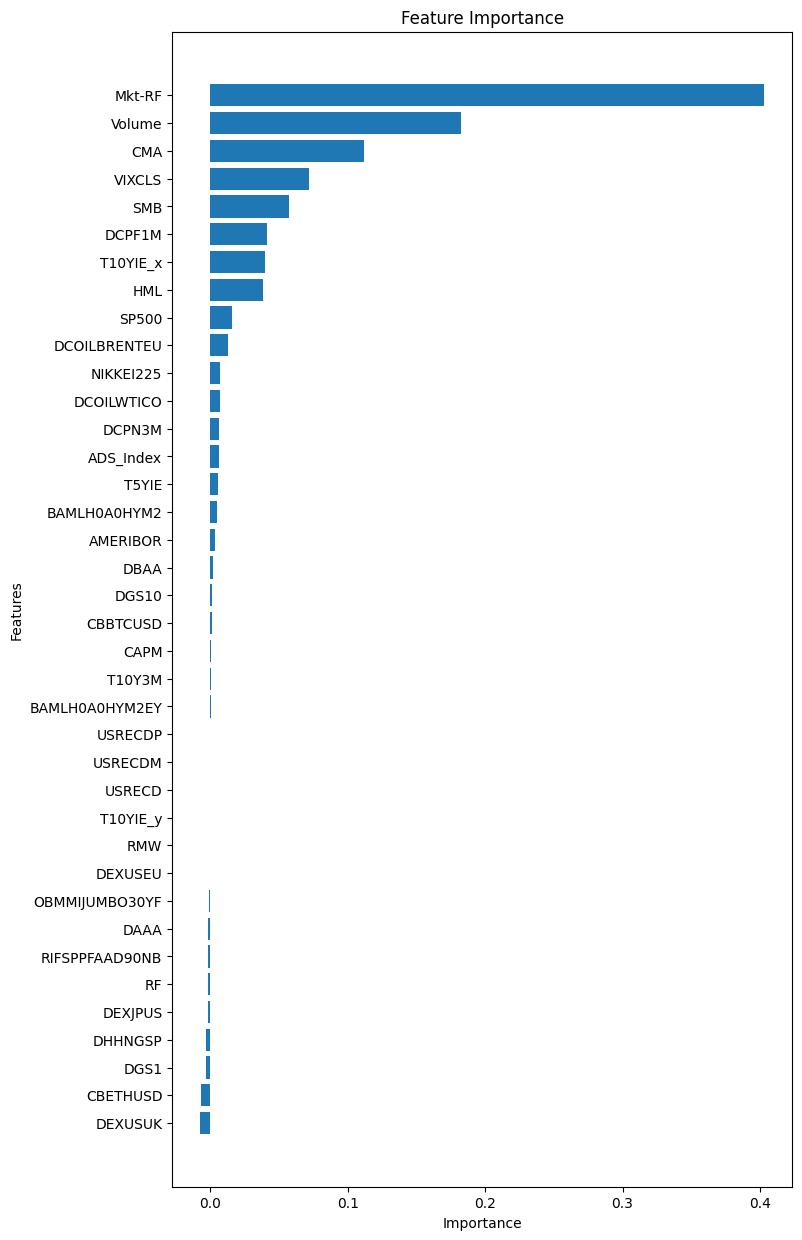

In [448]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42) # Computing feature importance

# Computing mean scores and obtaining features' names
importances = result.importances_mean
feature_names = X_test.columns

# Sorting Features importances and names
indices = importances.argsort()[::1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plotting Feature Importance plot
fig, ax = plt.subplots(figsize = (8,15))
ax.barh(sorted_features, sorted_importances)
ax.set_yticklabels(sorted_features)
ax.set_ylabel('Features')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.show()

# Task 6) Trading rules that uses buy-and-hold, long-short, or day trade

In [449]:
# GRU Model for Prediction:

ticker_symbol = 'NFLX'

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

netflix_data = data[['Adj Close']]

netflix_data['NFLX_Close'] = netflix_data['Adj Close']
netflix_data.dropna(inplace = True)
netflix_data = netflix_data.iloc[:,1:]



[*********************100%%**********************]  1 of 1 completed
<ipython-input-449-5c589294a834>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-449-5c589294a834>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [450]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(netflix_data).reshape(-1,1))

In [291]:
df1.shape

(753, 1)

In [451]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [452]:
len(train_data),len(test_data)

(489, 264)

In [453]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99 will go in Training   100th step is results for training model.
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [454]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [455]:
print(X_train.shape), print(y_train.shape)

(388, 100)
(388,)


(None, None)

In [456]:
print(X_test.shape), print(ytest.shape)

(163, 100)
(163,)


(None, None)

In [457]:
# reshape input to be [samples, time steps, features] which is required for GRU
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [198]:
X_train.shape

(388, 100, 1)

In [458]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error

In [459]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='relu'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='relu'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer='Adam',loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
3/3 [==============================] - 11s 500ms/step - loss: 0.2799
Epoch 2/50
3/3 [==============================] - 2s 478ms/step - loss: 0.2180
Epoch 3/50
3/3 [==============================] - 1s 300ms/step - loss: 0.1448
Epoch 4/50
3/3 [==============================] - 1s 309ms/step - loss: 0.0737
Epoch 5/50
3/3 [==============================] - 1s 304ms/step - loss: 0.0467
Epoch 6/50
3/3 [==============================] - 1s 307ms/step - loss: 0.0686
Epoch 7/50
3/3 [==============================] - 1s 309ms/step - loss: 0.0468
Epoch 8/50
3/3 [==============================] - 1s 320ms/step - loss: 0.0332
Epoch 9/50
3/3 [==============================] - 1s 313ms/step - loss: 0.0346
Epoch 10/50
3/3 [==============================] - 1s 312ms/step - loss: 0.0368
Epoch 11/50
3/3 [==============================] - 1s 313ms/step - loss: 0.0258
Epoch 12/50
3/3 [==============================] - 1s 307ms/step - loss: 0.0195
Epoch 13/50
3/3 [==============================]

In [460]:
### Lets Do the prediction and check performance metrics
train_predict=regressorGRU.predict(X_train)
test_predict=regressorGRU.predict(X_test)

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6/6 [==============================] - 0s 65ms/step


In [461]:
# Calculate RMSE:
math.sqrt(mean_squared_error(y_train,train_predict))

416.8967899327497

In [462]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

398.66973284034214

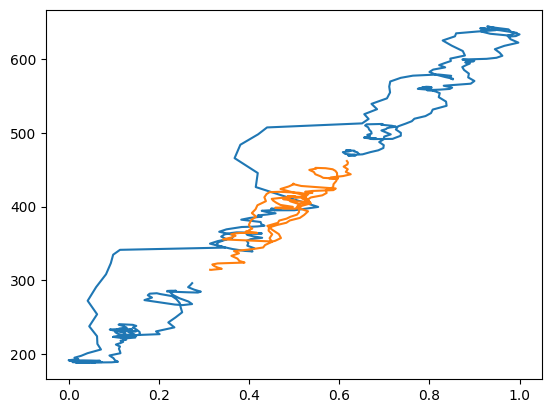

In [463]:
#plotting the predictions
plt.plot(y_train,train_predict)
plt.plot(ytest,test_predict)

Day Trade Algortithm
# Toy Model Back-Testing

In [464]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as ss
from sklearn import linear_model
import statsmodels.api as sm
from datetime import timedelta

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [465]:
# define daterange
start_date = datetime(2021,1,1)
end_date = datetime(2023,12,31)

# prepare features
feature = pd.read_csv('/content/drive/MyDrive/ML Finance/INFOP7374_FeatureMart.csv')
feature['Date'] = pd.to_datetime(feature['Date'])
feature = feature.set_index('Date')

# fetch target variable (stock price or stock returns)
stock_symbol = 'NFLX'
stock = yf.download(stock_symbol, start_date, end_date)
print(stock_symbol + ' Stock Price History')

data_frame = pd.merge(feature, stock, how='inner', on = 'Date')
data_frame = data_frame.fillna(method='ffill')
data_frame.head()

<ipython-input-465-47c410f138f4>:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

[*********************100%%**********************]  1 of 1 completed

NFLX Stock Price History


,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,OBMMIJUMBO30YF,...,DHHNGSP,USRECD,USRECDM,USRECDP,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-1.41,0.16,0.58,-0.64,0.10,-0.030460,0.172399,0.679529,0.84,2.884,...,2.60,0.0,0.0,0.0,539.000000,540.799988,515.090027,522.859985,522.859985,4444400
2021-01-05,0.86,1.32,0.49,0.36,0.55,-0.151746,0.708254,0.692205,0.87,2.871,...,2.77,0.0,0.0,0.0,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
2021-01-06,0.79,3.15,3.94,0.06,0.53,-0.219010,0.570990,0.703883,0.95,2.904,...,2.76,0.0,0.0,0.0,511.970001,513.099976,499.500000,500.489990,500.489990,5346200
2021-01-07,1.76,0.02,-0.83,-1.50,-0.20,-0.275264,1.484736,0.714569,0.99,2.910,...,2.81,0.0,0.0,0.0,508.279999,516.440002,506.420013,508.890015,508.890015,3686400
2021-01-08,0.51,-1.01,-1.37,-0.43,-0.37,0.039189,0.549189,0.724266,1.05,2.886,...,2.77,0.0,0.0,0.0,511.309998,513.239990,504.510010,510.399994,510.399994,2973900


In [466]:
data_frame.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF,SP500,ADS_Index,T10Y3M,OBMMIJUMBO30YF,...,DHHNGSP,USRECD,USRECDM,USRECDP,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-22,0.21,0.61,0.09,-0.64,0.19,-0.043992,0.166008,-0.032926,-1.54,6.869,...,2.54,0.0,0.0,0.0,494.000000,496.019989,485.450012,486.760010,486.760010,2701100
2023-12-26,0.48,0.81,0.46,-0.34,-0.15,-0.056834,0.423166,-0.088573,-1.56,6.891,...,2.50,0.0,0.0,0.0,489.390015,491.480011,486.380005,491.190002,491.190002,2034500
2023-12-27,0.16,0.16,0.12,-0.31,-0.14,-0.016956,0.143044,-0.105282,-1.65,7.048,...,2.63,0.0,0.0,0.0,491.239990,494.019989,489.250000,491.790009,491.790009,2561300
2023-12-28,-0.01,-0.38,0.03,-0.32,0.15,0.047017,0.037017,-0.123216,-1.61,6.866,...,2.55,0.0,0.0,0.0,492.000000,492.890015,489.070007,490.510010,490.510010,1710500
2023-12-29,-0.43,-1.13,-0.37,0.68,-0.07,0.147353,-0.282647,-0.142383,-1.52,6.514,...,2.58,0.0,0.0,0.0,490.369995,492.230011,481.940002,486.880005,486.880005,2739500


In [467]:
data_frame.shape

(753, 42)

In [468]:
# Three Models for user selections:
# 1. Least Angle Regression
# model = linear_model.Lars()
# 2. Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True, criterion='squared_error')
# 3. XGBoost
# model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=20, learning_rate = 0.05)

In [469]:
# define the rolling-window size
win = 252
horizon = 1
# find the index of a particular date
start = pd.Timestamp('2022-05-05')  # Example target date
train_start = data_frame.index.get_loc(start)
y_pred, y_test = {}, {}

position = 100
signal, gain_loss, balance = {}, {}, {}
balance[train_start] = 50000
data_frame = data_frame.reset_index()

# Iterate from 1st trading day 2023 to the last day
for today in data_frame.index[train_start:-1]:   # 821...

    yesterday = today - 1    # 821 -1 = 820
    tomorrow = today + 1    # 821 +1 = 822

    # Retrieve data for the past win days until yesterday
    X_train = data_frame.iloc[yesterday - win : yesterday, 1:-2] # 820 - 252 = 568 to 820
    y_train = data_frame['Adj Close'].iloc[today - win : today] # 821 - 252 = 569 to 821

    # Test
    X_test = data_frame.iloc[today-horizon : today, 1:-2] # 821 - 1 = 820

#   for each batch of the past_win_days_data, fit the model
    model.fit(X_train, y_train)
    # Making predictions on the test set
    y_pred[tomorrow] = model.predict(X_test)[0] # use today to predict tomorrow
    y_test[tomorrow] = data_frame['Open'].iloc[tomorrow] # take the actual open tomorrow
    # day trade gain or loss
    if y_pred[tomorrow] >= y_test[tomorrow]:
            signal[tomorrow] = 1
            gain_loss[tomorrow] = - position * data_frame['Open'].iloc[tomorrow] + position * data_frame['Close'].iloc[tomorrow]
    else:
            signal[tomorrow] = -1
            gain_loss[tomorrow] = position * data_frame['Open'].iloc[tomorrow] - position * data_frame['Close'].iloc[tomorrow]
    # calculate account balance
    balance[tomorrow] = balance[today] + gain_loss[tomorrow]

del balance[train_start]



In [470]:
train_start

337

In [471]:
signal = pd.DataFrame.from_dict(signal, orient = 'index', columns=['signal'])
gain_loss = pd.DataFrame.from_dict(gain_loss, orient = 'index', columns=['gain_loss'])
balance = pd.DataFrame.from_dict(balance, orient = 'index', columns=['balance'])

In [473]:
xyx = pd.concat([signal, gain_loss, balance], axis=1)
xyx['Date'] = data_frame['Date'][xyx.index]
xyx

,signal,gain_loss,balance,Date
338,1,-577.999878,49422.000122,2022-05-06
339,1,-455.999756,48966.000366,2022-05-09
340,1,165.000916,49131.001282,2022-05-10
341,1,-972.000122,48159.001160,2022-05-11
342,1,1034.999084,49194.000244,2022-05-12
...,...,...,...,...
748,-1,723.999023,26066.986084,2023-12-22
749,-1,-179.998779,25886.987305,2023-12-26
750,-1,-55.001831,25831.985474,2023-12-27
751,-1,148.999023,25980.984497,2023-12-28


In [474]:
# Set the 'date' column as the index
xyx['buy_hold'] = data_frame['Adj Close'].loc[xyx.index]*position
xyx.set_index('Date', inplace=True)


In [475]:
xyx

,signal,gain_loss,balance,buy_hold
Date,,,,
2022-05-06,1,-577.999878,49422.000122,18097.000122
2022-05-09,1,-455.999756,48966.000366,17310.000610
2022-05-10,1,165.000916,49131.001282,17766.000366
2022-05-11,1,-972.000122,48159.001160,16636.999512
2022-05-12,1,1034.999084,49194.000244,17430.999756
...,...,...,...,...
2023-12-22,-1,723.999023,26066.986084,48676.000977
2023-12-26,-1,-179.998779,25886.987305,49119.000244
2023-12-27,-1,-55.001831,25831.985474,49179.000854


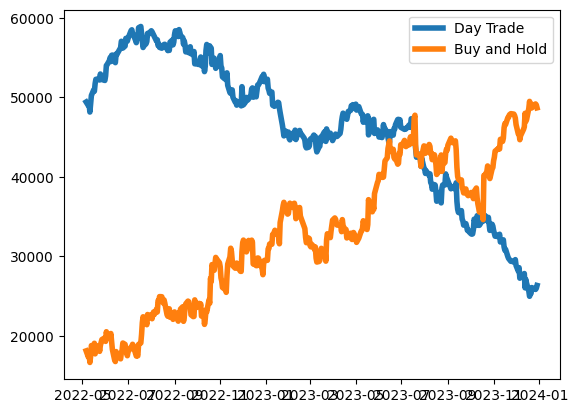

In [476]:
plt.plot(xyx['balance'], linewidth=4, linestyle='solid', label = 'Day Trade')
plt.plot(xyx['buy_hold'], linewidth=4, linestyle='solid', label = 'Buy and Hold')
plt.legend(loc="upper right")
plt.show()

# LSTM STACKED MODEL:

In [477]:
import pandas as pd
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np

In [478]:
ticker_symbol = 'NFLX'

# Define the start and end dates
start_date = '2021-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the desired columns
netflix_data = data[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [479]:
df1 = netflix_data.reset_index()['Adj Close']

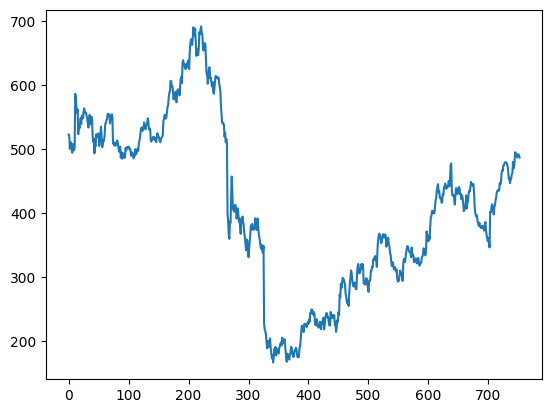

In [299]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [480]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [481]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [302]:
training_size,test_size

(489, 264)

In [303]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step),0]   # [(1 to 100), (2 to 101)]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [304]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [305]:
X_train.shape

(388, 100)

In [306]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [307]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [308]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # Input is always Features and , 1
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [309]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 [==============================] - 21s 1s/step - loss: 0.1364 - val_loss: 0.0239
Epoch 2/100
7/7 [==============================] - 2s 348ms/step - loss: 0.0226 - val_loss: 0.0085
Epoch 3/100
7/7 [==============================] - 4s 578ms/step - loss: 0.0125 - val_loss: 0.0037
Epoch 4/100
7/7 [==============================] - 4s 622ms/step - loss: 0.0096 - val_loss: 0.0047
Epoch 5/100
7/7 [==============================] - 3s 471ms/step - loss: 0.0075 - val_loss: 0.0032
Epoch 6/100
7/7 [==============================] - 3s 374ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 7/100
7/7 [==============================] - 2s 346ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 8/100
7/7 [==============================] - 3s 508ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 9/100
7/7 [==============================] - 3s 453ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 10/100
7/7 [==============================] - 3s 387ms/step - loss: 0.0053 - val_loss: 0.0041
Epoch 11/10

In [310]:
import tensorflow as tf

In [311]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 69ms/step


In [312]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [313]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

437.3381820339088

In [314]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

421.3569689365433

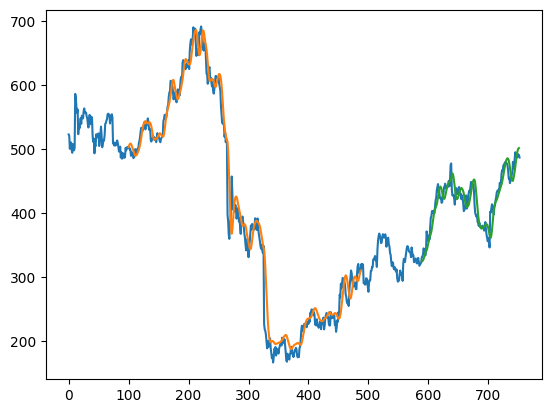

In [315]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [316]:
len(trainPredictPlot)

753

In [317]:
len(test_predict)

163

In [318]:
len(test_data)

264

In [319]:
x_input=test_data[164:].reshape(1,-1)
x_input.shape

(1, 100)

In [320]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [321]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.6338847]
101
1 day input [0.50180844 0.48597047 0.4976205  0.48985383 0.47414912 0.45044925
 0.45336176 0.46051932 0.46980891 0.49718265 0.45793039 0.47525318
 0.47911749 0.50182744 0.51073634 0.50885174 0.52065409 0.53740576
 0.53184728 0.52685985 0.52621257 0.53108579 0.51077439 0.46803851
 0.44567119 0.43891343 0.43407827 0.43750479 0.41865908 0.41456635
 0.40630473 0.41580368 0.40523872 0.40207873 0.39973728 0.40209778
 0.40729458 0.40047971 0.40076524 0.39256072 0.40954087 0.41799287
 0.39395037 0.37988273 0.37087873 0.36037081 0.37015535 0.36044697
 0.34230565 0.4481078  0.44656589 0.45775908 0.47087492 0.46615397
 0.45147721 0.44068377 0.46392673 0.46699156 0.48317217 0.49177643
 0.50633897 0.51086955 0.51062207 0.51450543 0.51165003 0.53466457
 0.52967714 0.53734865 0.56264754 0.5721846  0.57020484 0.58649966
 0.58741341 0.59321937 0.59618899 0.59544661 0.59512297 0.59167746
 0.58554786 0.5698812  0.54734256 0.54972206 0.53369377 0.54372573
 0.54707609 0.55874518 0.56466535 

In [322]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [323]:
import matplotlib.pyplot as plt

In [325]:
len(df1)

753

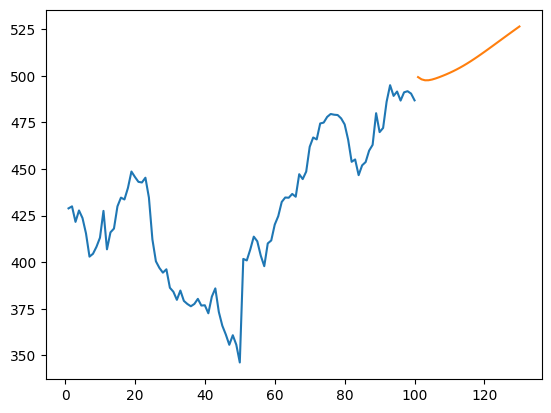

In [326]:
plt.plot(day_new,scaler.inverse_transform(df1[653:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

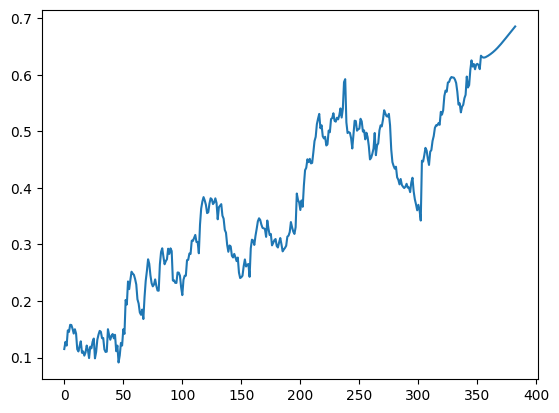

In [327]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])

In [328]:
df3=scaler.inverse_transform(df3).tolist()

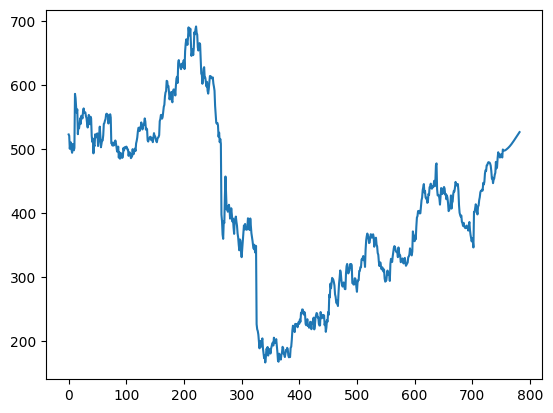

In [329]:
plt.plot(df3)

# Buy Hold Top to Bottom Strategy

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import plotly.express as px
from IPython.display import display

In [11]:
# fetch target variable (stock price or stock returns)
stock_symbol = 'NFLX'
start_date = datetime(2018,1,1)
end_date = datetime(2023,12,31)
stock = yf.download(stock_symbol, start_date, end_date, interval='1wk')

stk = pd.DataFrame(stock)
stk.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,196.100006,210.020004,195.419998,209.990005,209.990005,32621100
2018-01-08,210.020004,222.550003,206.910004,221.229996,221.229996,33516500
2018-01-15,224.240005,226.070007,216.320007,220.460007,220.460007,41413100
2018-01-22,222.000000,274.600006,221.199997,274.600006,274.600006,89119200
2018-01-29,274.200012,286.809998,262.709991,267.429993,267.429993,60500300


In [12]:
stk.reset_index('Date', inplace=True)
stk['Date'] = pd.to_datetime(stk['Date'], unit='s')

In [13]:

import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    x = stk['Date'],
    y = stk['Close'],
))
fig.update_layout(title = 'Time Series with YearMonth on X-axis')
fig.update_xaxes(tickformat = '%Y-%B', dtick='M1')

fig.show()


In [14]:
# Created all-time-high and bottom line:
import plotly.graph_objects as go

stk['all-time-high'] = stk['Close'].expanding().max()
stk['drawdown'] = 1 - stk['Close'] / stk['all-time-high']

display(stk)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=stk['Date'],
    y=stk['Close'],
    mode='lines',
    name='Close'
))
fig.add_trace(go.Scatter(
    x=stk['Date'],
    y=stk['all-time-high'],
    mode='lines',
    name='All Time High'
))

fig.update_layout(title='Time Series with YearMonth on X-axis')
fig.update_xaxes(tickformat='%Y-%B', dtick='M1')
fig.show()

# display(px.line(stk, x='Date', y='drawdown'))
fig1 = go.Figure(go.Scatter(
    x = stk['Date'],
    y = stk['drawdown'],
))
fig1.update_layout(title = 'Time Series with YearMonth on X-axis')
fig1.update_xaxes(tickformat = '%Y-%B', dtick='M1')

fig1.show()

,Date,Open,High,Low,Close,Adj Close,Volume,all-time-high,drawdown
0,2018-01-01,196.100006,210.020004,195.419998,209.990005,209.990005,32621100,209.990005,0.000000
1,2018-01-08,210.020004,222.550003,206.910004,221.229996,221.229996,33516500,221.229996,0.000000
2,2018-01-15,224.240005,226.070007,216.320007,220.460007,220.460007,41413100,221.229996,0.003480
3,2018-01-22,222.000000,274.600006,221.199997,274.600006,274.600006,89119200,274.600006,0.000000
4,2018-01-29,274.200012,286.809998,262.709991,267.429993,267.429993,60500300,274.600006,0.026111
...,...,...,...,...,...,...,...,...,...
308,2023-11-27,479.029999,482.000000,464.600006,465.739990,465.739990,17997000,690.309998,0.325318
309,2023-12-04,460.989990,461.200012,445.730011,453.760010,453.760010,19680000,690.309998,0.342672
310,2023-12-11,459.359985,481.250000,457.209991,472.059998,472.059998,27067300,690.309998,0.316162
311,2023-12-18,476.299988,500.890015,475.100006,486.760010,486.760010,20280700,690.309998,0.294868


In [372]:
def get_signal(row):
    drawdown = row['drawdown']

    if drawdown >= 0.35:
        return '>35% dd'
    elif drawdown >= 0.15:
        return '>15% dd'
    elif drawdown >= 0.05:
        return '>5% dd'
    else:
        return '< 5% dd'

stk['signal'] = stk.apply(get_signal, axis=1)
fig1 = px.scatter(stk, x='Date', y='drawdown', color='signal')
fig1.update_layout(title='Time Series with YearMonth on X-axis')
fig1.update_xaxes(tickformat='%Y-%B', dtick='M1')

fig1.show()
stk['count_value'] = 1
display(px.pie(stk.groupby('signal').agg({'count_value': 'count'}).reset_index(), values='count_value', names='signal'))

In [337]:
# creating backtest and position classes

class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp, comment):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        self.comment = comment

    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'

    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }


class Strategy:
    def __init__(self, df, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.positions = []
        self.data = df
        self.trading_allowed = True

    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df

    def add_position(self, position):
        self.positions.append(position)

        return True

    def trade(self, drawdown, data):
        self.trading_allowed = True
        if data.signal == drawdown:
            for pos in self.positions:
                if pos.status == 'open' and pos.comment == drawdown:
                    self.trading_allowed = False
                    break
            if self.trading_allowed:
                self.add_position(Position(data.Date, data.Close, 'buy', self.volume, 0.0, 0.0, drawdown))


# logic
    def run(self):
        for i, data in self.data.iterrows():

            # opening positions at different dd levels
            self.trade('>5% dd', data)
            self.trade('>15% dd', data)
            self.trade('>35% dd', data)

            # if drawdown is 0, close all positions
            if data.drawdown == 0.0:
                for pos in self.positions:
                    if pos.status == 'open':
                        pos.close_position(data.Date, data.Close)

        return self.get_positions_df()

In [374]:
buy_dd_strategy = Strategy(stk, 15000, 1)
result = buy_dd_strategy.run()

display(result)
fig = go.Figure(go.Scatter(
    x=result['open_datetime'],
    y=result['pnl'],
    mode='lines'
))
fig.update_xaxes(tickformat='%Y-%B', dtick='M1')
fig.update_layout(title='Line Plot of PNL over Time')
fig.update_xaxes(title='Open Datetime')
fig.update_yaxes(title='PNL')

fig.show()

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2018-02-05,249.470001,buy,1,0.0,0.0,2018-02-12,278.519989,29.049988,closed,15029.049988
1,2018-03-19,300.940002,buy,1,0.0,0.0,2018-05-21,351.290009,50.350006,closed,15079.399994
2,2018-07-16,361.049988,buy,1,0.0,0.0,2020-04-13,422.959991,61.910004,closed,15141.309998
3,2018-07-30,343.089996,buy,1,0.0,0.0,2020-04-13,422.959991,79.869995,closed,15221.179993
4,2018-11-19,258.820007,buy,1,0.0,0.0,2020-04-13,422.959991,164.139984,closed,15385.319977
5,2020-05-18,429.320007,buy,1,0.0,0.0,2020-06-29,476.890015,47.570007,closed,15432.889984
6,2020-07-13,492.989990,buy,1,0.0,0.0,2021-01-18,565.169983,72.179993,closed,15505.069977
7,2021-01-25,532.390015,buy,1,0.0,0.0,2021-08-30,590.530029,58.140015,closed,15563.209991
8,2021-11-01,645.719971,buy,1,0.0,0.0,NaT,NaN,NaN,open,NaN
9,2021-12-13,586.729980,buy,1,0.0,0.0,NaT,NaN,NaN,open,NaN


# Long Short || Day Trade

In [378]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download Netflix stock data
def download_stock_data(symbol, start, end):
    stock_data = yf.download(symbol, start=start, end=end)
    return stock_data

# Implement Buy and Hold Strategy function
def buy_and_hold(prices):
    # Buy on the first day and sell on the last day
    return {
        'open_datetime': prices.index[0],
        'open_price': prices.iloc[0],
        'order_type': 'buy',
        'volume': 1,
        'sl': 0.0,
        'tp': 0.0,
        'close_datetime': prices.index[-1],
        'close_price': prices.iloc[-1],
        'profit': prices.iloc[-1] - prices.iloc[0],
        'status': 'closed',
        'pnl': (prices.iloc[-1] / prices.iloc[0] - 1) * 100
    }

# Long-Short Strategy function
def long_short_strategy(prices):
    # Simple logic for the strategy
    ma_100 = prices.rolling(100).mean()
    trades = []
    position = None  # Start with no position
    for i in range(100, len(prices)):
        if prices.iloc[i] > ma_100.iloc[i] and position != 'long':
            # Close short position if exists and go long
            if position == 'short':
                trades[-1]['close_datetime'] = prices.index[i]
                trades[-1]['close_price'] = prices.iloc[i]
                trades[-1]['profit'] = trades[-1]['open_price'] - prices.iloc[i]
                trades[-1]['status'] = 'closed'
                trades[-1]['pnl'] = (trades[-1]['profit'] / trades[-1]['open_price']) * 100
            # Open new long position
            trades.append({
                'open_datetime': prices.index[i],
                'open_price': prices.iloc[i],
                'order_type': 'buy',
                'volume': 1,
                'sl': 0.0,
                'tp': 0.0,
                'status': 'open',
            })
            position = 'long'
        elif prices.iloc[i] < ma_100.iloc[i] and position != 'short':
            # Close long position if exists and go short
            if position == 'long':
                trades[-1]['close_datetime'] = prices.index[i]
                trades[-1]['close_price'] = prices.iloc[i]
                trades[-1]['profit'] = prices.iloc[i] - trades[-1]['open_price']
                trades[-1]['status'] = 'closed'
                trades[-1]['pnl'] = (trades[-1]['profit'] / trades[-1]['open_price']) * 100
            # Open new short position
            trades.append({
                'open_datetime': prices.index[i],
                'open_price': prices.iloc[i],
                'order_type': 'sell',
                'volume': 1,
                'sl': 0.0,
                'tp': 0.0,
                'status': 'open',
            })
            position = 'short'
    # Close any open position at the end
    if trades and trades[-1]['status'] == 'open':
        trades[-1]['close_datetime'] = prices.index[-1]
        trades[-1]['close_price'] = prices.iloc[-1]
        if position == 'long':
            trades[-1]['profit'] = prices.iloc[-1] - trades[-1]['open_price']
        else:
            trades[-1]['profit'] = trades[-1]['open_price'] - prices.iloc[-1]
        trades[-1]['status'] = 'closed'
        trades[-1]['pnl'] = (trades[-1]['profit'] / trades[-1]['open_price']) * 100
    return trades

# Day Trade Strategy function
def day_trade_strategy(data):
    trades = []
    for i in range(len(data)):
        trades.append({
            'open_datetime': data.index[i],
            'open_price': data.iloc[i]['Open'],
            'order_type': 'buy',
            'volume': 1,
            'sl': 0.0,
            'tp': 0.0,
            'close_datetime': data.index[i],
            'close_price': data.iloc[i]['Close'],
            'profit': data.iloc[i]['Close'] - data.iloc[i]['Open'],
            'status': 'closed',
            'pnl': ((data.iloc[i]['Close'] - data.iloc[i]['Open']) / data.iloc[i]['Open']) * 100
        })
    return trades

# Simulate the strategies and produce the results
def simulate_strategies(symbol, start, end):
    stock_data = download_stock_data(symbol, start, end)

    # Apply each strategy
    bh_trade = buy_and_hold(stock_data['Close'])
    ls_trades = long_short_strategy(stock_data['Close'])
    dt_trades = day_trade_strategy(stock_data)

    # Combine all trades into a single DataFrame
    all_trades = [bh_trade] + ls_trades + dt_trades
    trades_df = pd.DataFrame(all_trades)

    return trades_df

# Run the simulation and produce the DataFrame
simulated_trading_df = simulate_strategies('NFLX', '2021-01-01', '2023-12-31')
simulated_trading_df

[*********************100%%**********************]  1 of 1 completed


,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2021-01-04,522.859985,buy,1,0.0,0.0,2023-12-29,486.880005,-35.979980,closed,-6.881380
1,2021-05-27,503.859985,sell,1,0.0,0.0,2021-06-25,527.070007,-23.210022,closed,-4.606443
2,2021-06-25,527.070007,buy,1,0.0,0.0,2021-07-21,513.630005,-13.440002,closed,-2.549946
3,2021-07-21,513.630005,sell,1,0.0,0.0,2021-07-23,515.409973,-1.779968,closed,-0.346547
4,2021-07-23,515.409973,buy,1,0.0,0.0,2021-07-29,514.250000,-1.159973,closed,-0.225058
...,...,...,...,...,...,...,...,...,...,...,...
777,2023-12-22,494.000000,buy,1,0.0,0.0,2023-12-22,486.760010,-7.239990,closed,-1.465585
778,2023-12-26,489.390015,buy,1,0.0,0.0,2023-12-26,491.190002,1.799988,closed,0.367802
779,2023-12-27,491.239990,buy,1,0.0,0.0,2023-12-27,491.790009,0.550018,closed,0.111965
780,2023-12-28,492.000000,buy,1,0.0,0.0,2023-12-28,490.510010,-1.489990,closed,-0.302844


[*********************100%%**********************]  1 of 1 completed


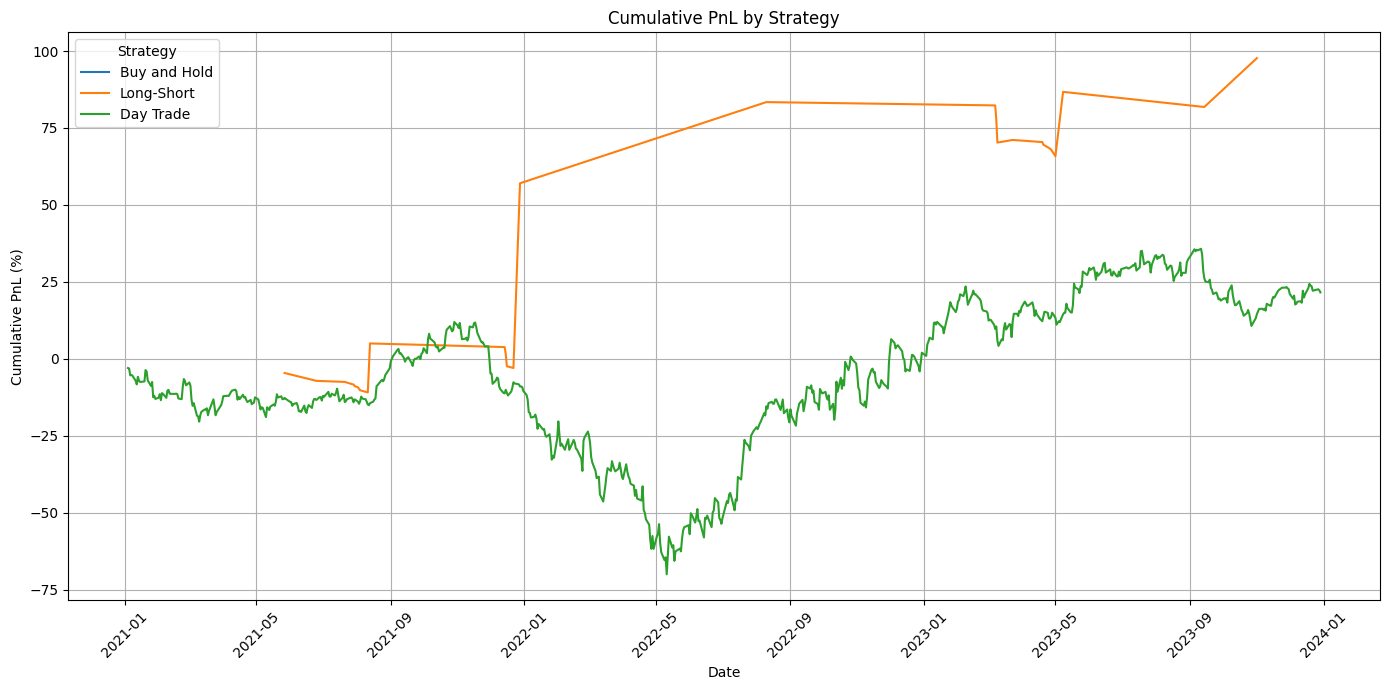

In [379]:
# Let's simulate the strategies as per the provided code and then create separate cumulative PnL graphs
# for the different trading strategies.

# First, we need to label each trade with the appropriate strategy.
# This function adds a 'strategy' column to the trades DataFrame to identify the strategy used for each trade.
def label_strategies(bh_trade, ls_trades, dt_trades):
    bh_trade['strategy'] = 'Buy and Hold'
    for trade in ls_trades:
        trade['strategy'] = 'Long-Short'
    for trade in dt_trades:
        trade['strategy'] = 'Day Trade'
    return [bh_trade] + ls_trades + dt_trades

# Next, we simulate the strategies and label them
stock_data = download_stock_data('NFLX', '2021-01-01', '2023-12-31')
bh_trade = buy_and_hold(stock_data['Close'])
ls_trades = long_short_strategy(stock_data['Close'])
dt_trades = day_trade_strategy(stock_data)
all_trades = label_strategies(bh_trade, ls_trades, dt_trades)
trades_df = pd.DataFrame(all_trades)

# Now, we plot the cumulative PnL for each strategy
def plot_cumulative_pnl_by_strategy(trades_df):
    trades_df['cumulative_pnl'] = trades_df.groupby('strategy')['pnl'].cumsum()
    strategies = trades_df['strategy'].unique()

    plt.figure(figsize=(14, 7))

    for strategy in strategies:
        strategy_trades = trades_df[trades_df['strategy'] == strategy]
        plt.plot(strategy_trades['open_datetime'], strategy_trades['cumulative_pnl'], label=strategy)

    plt.title('Cumulative PnL by Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative PnL (%)')
    plt.legend(title='Strategy')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Execute the plotting function
plot_cumulative_pnl_by_strategy(trades_df)

# RSI Indicator strategy:

RSI indicator drops below 30 (oversold), we will buy and when RSI exceeds above 70 (overbought), we will sell.

we will use the ATR Indicator. ATR measures the average range for each period and is therefore a good volatility indicator. After entering a trade, we will set take profit and stop loss to 2 ATR each

In [24]:
import pandas as pd
import plotly.express as px

In [29]:
stock_symbol = 'NFLX'
start_date = datetime(2018,1,1)
end_date = datetime(2023,12,31)
stock = yf.download(stock_symbol, start_date, end_date, interval='1wk')

rstk = pd.DataFrame(stock)
rstk.reset_index('Date',inplace=True)
rstk.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,196.100006,210.020004,195.419998,209.990005,209.990005,32621100
1,2018-01-08,210.020004,222.550003,206.910004,221.229996,221.229996,33516500
2,2018-01-15,224.240005,226.070007,216.320007,220.460007,220.460007,41413100
3,2018-01-22,222.000000,274.600006,221.199997,274.600006,274.600006,89119200
4,2018-01-29,274.200012,286.809998,262.709991,267.429993,267.429993,60500300


In [31]:

fig = go.Figure(go.Scatter(
    x=rstk['Date'],
    y=rstk['Close'],
    mode='lines'
))
fig.update_xaxes(tickformat='%Y-%B', dtick='M1')
fig.update_layout(title='Line Plot of NFLX over Time')
fig.update_xaxes(title='Open Datetime')
fig.update_yaxes(title='NFLX')

fig.show()

In [38]:
# setting the RSI Period
rsi_period = 14

# to calculate RSI, we first need to calculate the exponential weighted aveage gain and loss during the period
rstk['gain'] = (rstk['Close'] - rstk['Open']).apply(lambda x: x if x > 0 else 0)
rstk['loss'] = (rstk['Close'] - rstk['Open']).apply(lambda x: -x if x < 0 else 0)

# here we use the same formula to calculate Exponential Moving Average
rstk['ema_gain'] = rstk['gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
rstk['ema_loss'] = rstk['loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

# the Relative Strength is the ratio between the exponential avg gain divided by the exponential avg loss
rstk['rs'] = rstk['ema_gain'] / rstk['ema_loss']

# the RSI is calculated based on the Relative Strength using the following formula
rstk['rsi_14'] = 100 - (100 / (rstk['rs'] + 1))

# displaying the results
display(rstk[['Date', 'rsi_14', 'rs', 'ema_gain', 'ema_loss']])




,Date,rsi_14,rs,ema_gain,ema_loss
0,2018-01-01,NaN,NaN,NaN,NaN
1,2018-01-08,NaN,NaN,NaN,NaN
2,2018-01-15,NaN,NaN,NaN,NaN
3,2018-01-22,NaN,NaN,NaN,NaN
4,2018-01-29,NaN,NaN,NaN,NaN
...,...,...,...,...,...
308,2023-11-27,64.809136,1.841647,10.930447,5.935149
309,2023-12-04,60.799352,1.550978,9.473054,6.107793
310,2023-12-11,65.167384,1.870873,9.903315,5.293421
311,2023-12-18,68.502737,2.174879,9.977543,4.587631


In [40]:

import plotly.graph_objects as go

# Define overbought and oversold levels
overbought_level = 70
oversold_level = 30

# Create the figure
fig_rsi = go.Figure()

# Add RSI line plot
fig_rsi.add_trace(go.Scatter(
    x=rstk['Date'],
    y=rstk['rsi_14'],
    mode='lines',
    name='RSI'
))

# Add horizontal lines for overbought and oversold levels
fig_rsi.add_hline(y=overbought_level, line_dash='dash', line_color='red', opacity=0.5, annotation_text="Overbought")
fig_rsi.add_hline(y=oversold_level, line_dash='dash', line_color='green', opacity=0.5, annotation_text="Oversold")

fig_rsi.update_xaxes(tickformat='%Y-%B', dtick='M1')
# Update layout
fig_rsi.update_layout(
    title='RSI Indicator with Overbought and Oversold Levels',
    xaxis_title='Date',
    yaxis_title='RSI (14-period)',
)

# Show plot
fig_rsi.show()


Calculating ATR Indicator

In [42]:
atr_period = 14  # defining the atr period to 14

# calculating the range of each candle
rstk['range'] = rstk['High'] - rstk['Low']

# calculating the average value of ranges
rstk['atr_14'] = rstk['range'].rolling(atr_period).mean()

display(rstk[['Date', 'atr_14']])

# plotting the ATR Indicator
fig = go.Figure(go.Scatter(
    x=rstk['Date'],
    y=rstk['atr_14'],
    mode='lines'
))
fig.update_xaxes(tickformat='%Y-%B', dtick='M1')
fig.update_layout(title='ATR Indicator')

fig.show()

,Date,atr_14
0,2018-01-01,NaN
1,2018-01-08,NaN
2,2018-01-15,NaN
3,2018-01-22,NaN
4,2018-01-29,NaN
...,...,...
308,2023-11-27,29.067150
309,2023-12-04,27.870006
310,2023-12-11,28.390721
311,2023-12-18,26.314292


In [43]:
# class Position contain data about trades opened/closed during the backtest
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'

    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'

    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }


# class Strategy defines trading logic and evaluates the backtest based on opened/closed positions
class Strategy:
    def __init__(self, df, starting_balance):
        self.starting_balance = starting_balance
        self.positions = []
        self.data = df

    # return backtest result
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df

    # add Position class to list
    def add_position(self, position):
        self.positions.append(position)
        return True

    # close positions when stop loss or take profit is reached
    def close_tp_sl(self, data):
        for pos in self.positions:
                    if pos.status == 'open':
                        if (pos.sl >= data.Close and pos.order_type == 'buy'):
                            pos.close_position(data.Date, pos.sl)
                        elif (pos.sl <= data.Close and pos.order_type == 'sell'):
                            pos.close_position(data.Date, pos.sl)
                        elif (pos.tp <= data.Close and pos.order_type == 'buy'):
                            pos.close_position(data.Date, pos.tp)
                        elif (pos.tp >= data.Close and pos.order_type == 'sell'):
                            pos.close_position(data.Date, pos.tp)

    # check for open positions
    def has_open_positions(self):
        for pos in self.positions:
            if pos.status == 'open':
                return True
        return False

    # strategy logic how positions should be opened/closed
    def logic(self, data):

        # if no position is open
        if not self.has_open_positions():

            # if RSI less then 30 -> BUY
            if data['rsi_14'] < 30:

                # Position variables
                open_datetime = data['Date']
                open_price = data['Close']
                order_type = 'buy'
                volume = 10000
                sl = open_price - 2 * data['atr_14']
                tp = open_price + 2 * data['atr_14']

                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))

            # if RSI greater than 70 -> SELL
            elif data['rsi_14'] > 70:

                # Position variables
                open_datetime = data['Date']
                open_price = data['Close']
                order_type = 'sell'
                volume = 10000
                sl = open_price + 2 * data['atr_14']
                tp = open_price - 2 * data['atr_14']

                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))


# logic
    def run(self):
        # data represents a moment in time while iterating through the backtest
        for i, data in self.data.iterrows():
            # close positions when stop loss or take profit is reached
            self.close_tp_sl(data)

            # strategy logic
            self.logic(data)

        return self.get_positions_df()

In [44]:
backtest_df = rstk[14:]  # removing NaN values
backtest_df

,Date,Open,High,Low,Close,Adj Close,Volume,gain,loss,ema_gain,ema_loss,rs,rsi_14,range,atr_14
14,2018-04-09,291.769989,317.489990,289.119995,311.649994,311.649994,57687500,19.880005,0.000000,9.812535,5.609355,1.749316,63.627316,28.369995,27.094287
15,2018-04-16,315.989990,338.820007,304.000000,327.769989,327.769989,82993000,11.779999,0.000000,10.104434,4.777132,2.115167,67.898995,34.820007,28.464288
16,2018-04-23,329.149994,331.220001,292.619995,311.760010,311.760010,54122000,0.000000,17.389984,8.627505,6.620709,1.303109,56.580430,38.600006,30.525003
17,2018-04-30,311.070007,320.980011,305.730011,320.089996,320.089996,32167800,9.019989,0.000000,8.684146,5.665245,1.532881,60.519266,15.250000,27.800002
18,2018-05-07,321.989990,332.059998,319.339996,326.459991,326.459991,27378900,4.470001,0.000000,8.082589,4.856548,1.664266,62.466214,12.720001,26.987144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2023-11-27,479.029999,482.000000,464.600006,465.739990,465.739990,17997000,0.000000,13.290009,10.930447,5.935149,1.841647,64.809136,17.399994,29.067150
309,2023-12-04,460.989990,461.200012,445.730011,453.760010,453.760010,19680000,0.000000,7.229980,9.473054,6.107793,1.550978,60.799352,15.470001,27.870006
310,2023-12-11,459.359985,481.250000,457.209991,472.059998,472.059998,27067300,12.700012,0.000000,9.903315,5.293421,1.870873,65.167384,24.040009,28.390721
311,2023-12-18,476.299988,500.890015,475.100006,486.760010,486.760010,20280700,10.460022,0.000000,9.977543,4.587631,2.174879,68.502737,25.790009,26.314292


In [45]:
# creating an instance of Strategy class
rsi_strategy = Strategy(backtest_df, 10000)

# running the backtest
backtest_result = rsi_strategy.run()

backtest_result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2018-05-21,351.290009,sell,10000,400.647151,301.932866,2018-06-18,400.647151,-4.935714e+05,closed,-4.835714e+05
1,2018-06-18,411.089996,sell,10000,462.958561,359.221431,2018-07-23,359.221431,5.186857e+05,closed,3.511422e+04
2,2018-11-12,286.209991,buy,10000,212.745701,359.674282,2019-02-18,359.674282,7.346429e+05,closed,7.697571e+05
3,2019-02-18,363.019989,sell,10000,420.698558,305.341420,2019-08-12,305.341420,5.767857e+05,closed,1.346543e+06
4,2019-09-16,270.750000,buy,10000,222.215720,319.284280,2019-12-16,319.284280,4.853428e+05,closed,1.831886e+06
5,2019-12-16,336.899994,sell,10000,378.995710,294.804278,2020-02-10,378.995710,-4.209572e+05,closed,1.410928e+06
6,2020-02-10,380.399994,sell,10000,420.322854,340.477134,2020-03-09,340.477134,3.992286e+05,closed,1.810157e+06
7,2020-03-16,332.829987,sell,10000,390.454276,275.205697,2020-04-13,390.454276,-5.762429e+05,closed,1.233914e+06
8,2020-04-13,422.959991,sell,10000,491.767129,354.152854,2020-07-06,491.767129,-6.880714e+05,closed,5.458428e+05
9,2020-07-06,548.729980,sell,10000,628.472839,468.987122,2021-10-04,628.472839,-7.974286e+05,closed,-2.515858e+05


In [48]:
# analysing closed positions only
backtest_result = backtest_result[backtest_result['status'] == 'closed']

# visualizing trades
# fig_backtest = px.line(df, x='Date', y=['Close'], title='RSI Strategy - Trades')

fig_backtest = go.Figure()

# Add 'Close' line plot
fig_backtest.add_trace(go.Scatter(
    x=rstk['Date'],
    y=rstk['Close'],
))

# Update layout
fig_backtest.update_layout(
    title='RSI Strategy - Trades',
)
fig_backtest.update_xaxes(tickformat='%Y-%B', dtick='M1')


# adding trades to plots
for i, position in backtest_result.iterrows():
    if position.status == 'closed':
        fig_backtest.add_shape(type="line",
            x0=position.open_datetime, y0=position.open_price, x1=position.close_datetime, y1=position.close_price,
            line=dict(
                color="green" if position.profit >= 0 else "red",
                width=3)
            )

fig_backtest

In [49]:
fig_pnl = go.Figure()

# Add line plot
fig_pnl.add_trace(go.Scatter(
    x=backtest_result['close_datetime'],
    y=backtest_result['pnl'],
    mode='lines',
))

# Update layout
fig_pnl.update_layout(
    title='PnL Plot',
    xaxis_title='Close Datetime',
    yaxis_title='PnL',
)
fig_pnl.update_xaxes(tickformat='%Y-%B', dtick='M1')

# Show plot
fig_pnl.show()
